# Artificial Basic Neural Network 

Following [this](https://www.tensorflow.org/tutorials/keras/classification) tutorial

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

60,000 thousand images used to train and 10,000 used to train

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

In [15]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

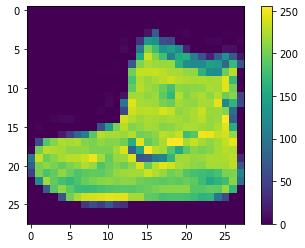

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [90]:
train_images[0].shape

(32, 32, 3)

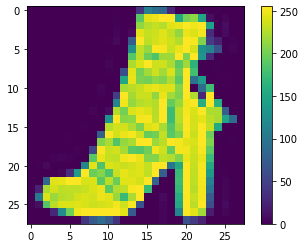

In [17]:
plt.figure()
plt.imshow(train_images[11])
plt.colorbar()
plt.grid(False)
plt.show()

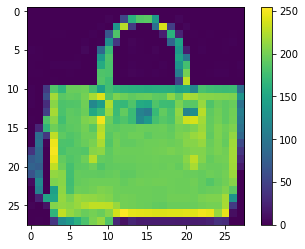

In [18]:
plt.figure()
plt.imshow(test_images[69])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

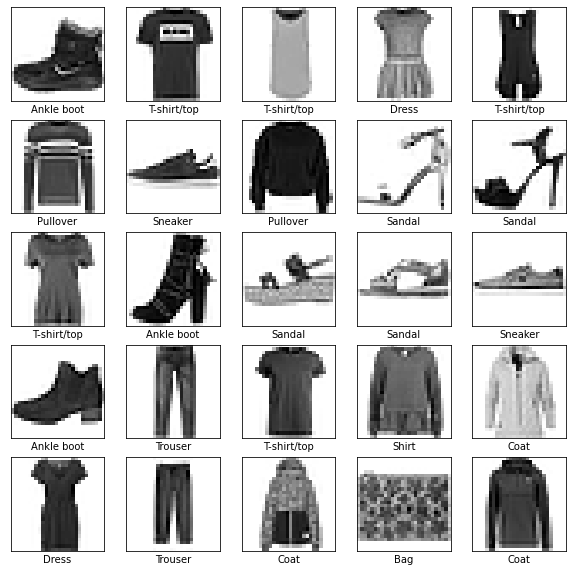

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [7]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5012 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3770 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3392 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3141 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2979 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2818 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2689 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2576 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2498 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.240

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3789 - accuracy: 0.8701

Test accuracy: 0.8701000213623047


In [10]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [11]:
predictions = probability_model.predict(test_images)

In [12]:
predictions[69]

array([1.8450054e-11, 9.9129155e-15, 8.8340810e-12, 3.8385721e-15,
       2.1579722e-11, 7.7757811e-15, 8.4024389e-13, 5.8591860e-12,
       1.0000000e+00, 1.5175673e-11], dtype=float32)

In [13]:
np.argmax(predictions[420])

5

In [14]:
class_names[5]

'Sandal'

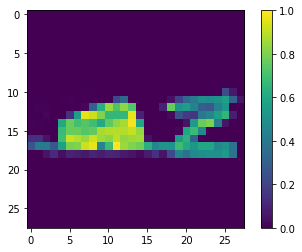

In [15]:
plt.figure()
plt.imshow(test_images[420])
plt.colorbar()
plt.grid(False)
plt.show()

In [42]:
np.argmax(predictions[111])

5

In [43]:
class_names[5]

'Sandal'

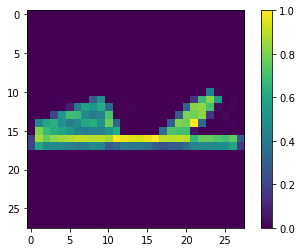

In [44]:
plt.figure()
plt.imshow(test_images[111])
plt.colorbar()
plt.grid(False)
plt.show()

In [47]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({}))".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

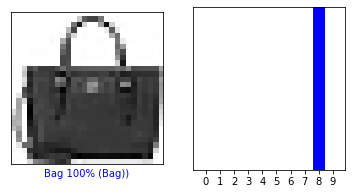

In [29]:
i = 69
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

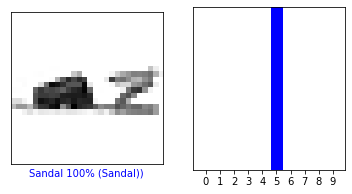

In [22]:
i = 420
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

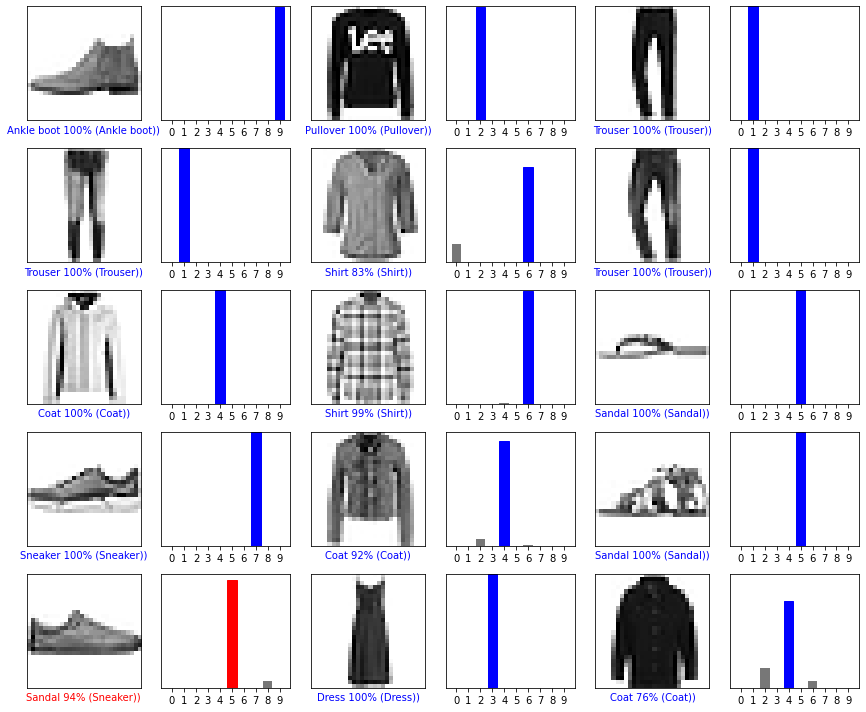

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [48]:
# Grab an image from the test dataset
img = test_images[420]
print(img.shape)

(28, 28)


In [49]:
# Add the image to a batch where it's the only member
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [50]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.4822228e-10 3.0778602e-14 9.8210204e-09 9.1813296e-14 1.2514411e-07
  9.9998939e-01 1.3940138e-10 1.8108302e-07 1.0282369e-05 3.8031793e-11]]


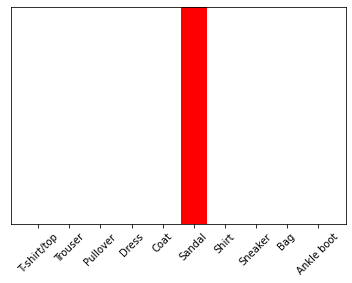

In [51]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [41]:
np.argmax(predictions_single[0])

5

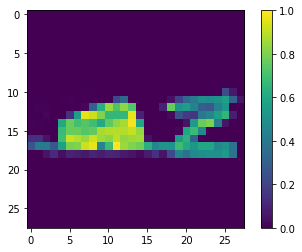

In [52]:
plt.figure()
plt.imshow(test_images[420])
plt.colorbar()
plt.grid(False)
plt.show()

The prediction works as desired but for some reason that plot value array for this case is using red when it shouldn't.

# Convolutional Neural Network 

Following [this](https://www.tensorflow.org/tutorials/images/cnn) other tutorial.

In [53]:
from tensorflow.keras import datasets, layers, models

In [56]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

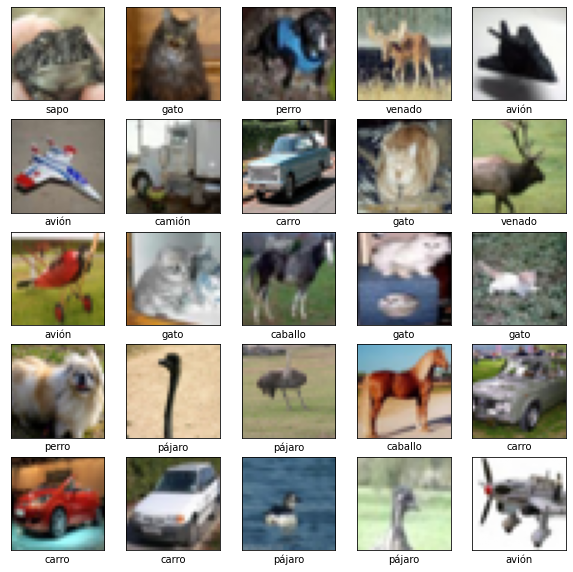

In [78]:
class_names = ['avión', 'carro', 'pájaro', 'gato', 'venado', 'perro', 'sapo', 'caballo', 'barco', 'camión']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[25+i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[25+i][0]])
plt.show()

In [80]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [85]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 226s 144ms/step - loss: 1.5391 - accuracy: 0.4379 - val_loss: 1.2912 - val_accuracy: 0.5424
Epoch 2/10
1563/1563 [==============================] - 218s 140ms/step - loss: 1.1682 - accuracy: 0.5873 - val_loss: 1.0787 - val_accuracy: 0.6174
Epoch 3/10
1563/1563 [==============================] - 230s 147ms/step - loss: 1.0245 - accuracy: 0.6409 - val_loss: 1.0007 - val_accuracy: 0.6461
Epoch 4/10
1563/1563 [==============================] - 231s 148ms/step - loss: 0.9294 - accuracy: 0.6752 - val_loss: 0.9507 - val_accuracy: 0.6659
Epoch 5/10
1563/1563 [==============================] - 244s 156ms/step - loss: 0.8609 - accuracy: 0.6995 - val_loss: 0.9423 - val_accuracy: 0.6698
Epoch 6/10
1563/1563 [==============================] - 239s 153ms/step - loss: 0.8028 - accuracy: 0.7189 - val_loss: 0.9917 - val_accuracy: 0.6606
Epoch 7/10
1563/1563 [==============================] - 235s 150ms/step - loss: 0.7591 - accuracy: 0.7326 - val_

313/313 - 16s - loss: 0.8706 - accuracy: 0.7069


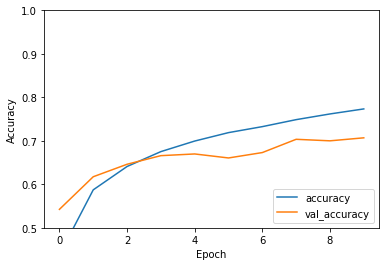

In [87]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [88]:
print(test_acc)

0.7069000005722046


In [94]:
train_labels[0]

array([6], dtype=uint8)

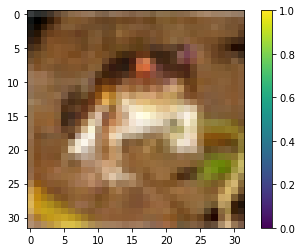

In [95]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [97]:
class_names[6]

'sapo'

# Random Forest 

adapted from [this](https://www.astroml.org/book_figures/chapter9/fig_photoz_forest.html) source code

# Boosted Decision Tree 